In [1]:
import os
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cf

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite')

In [5]:
DATA = xr.open_dataset(os.path.join(dir_base,'IMERG','1dy','IMERG_Italy_1dy_2000_06_01_2024_02_29.nc'))

lon2d, lat2d = np.meshgrid(DATA['lon'].values, DATA['lat'].values)
PRE = DATA.PRE.values

del DATA

In [26]:
DATA = xr.open_dataset(os.path.join(dir_base, '5_DOWN', 'ITALY_DOWN_IMERG_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc'))

lon2d_d, lat2d_d = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

NYs = DATA.NYs.values
CYs = DATA.CYs.values
WYs = DATA.WYs.values

NYd = DATA.NYd.values
CYd = DATA.CYd.values
WYd = DATA.WYd.values

Mev_d = DATA.Mev_d.values

del DATA

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


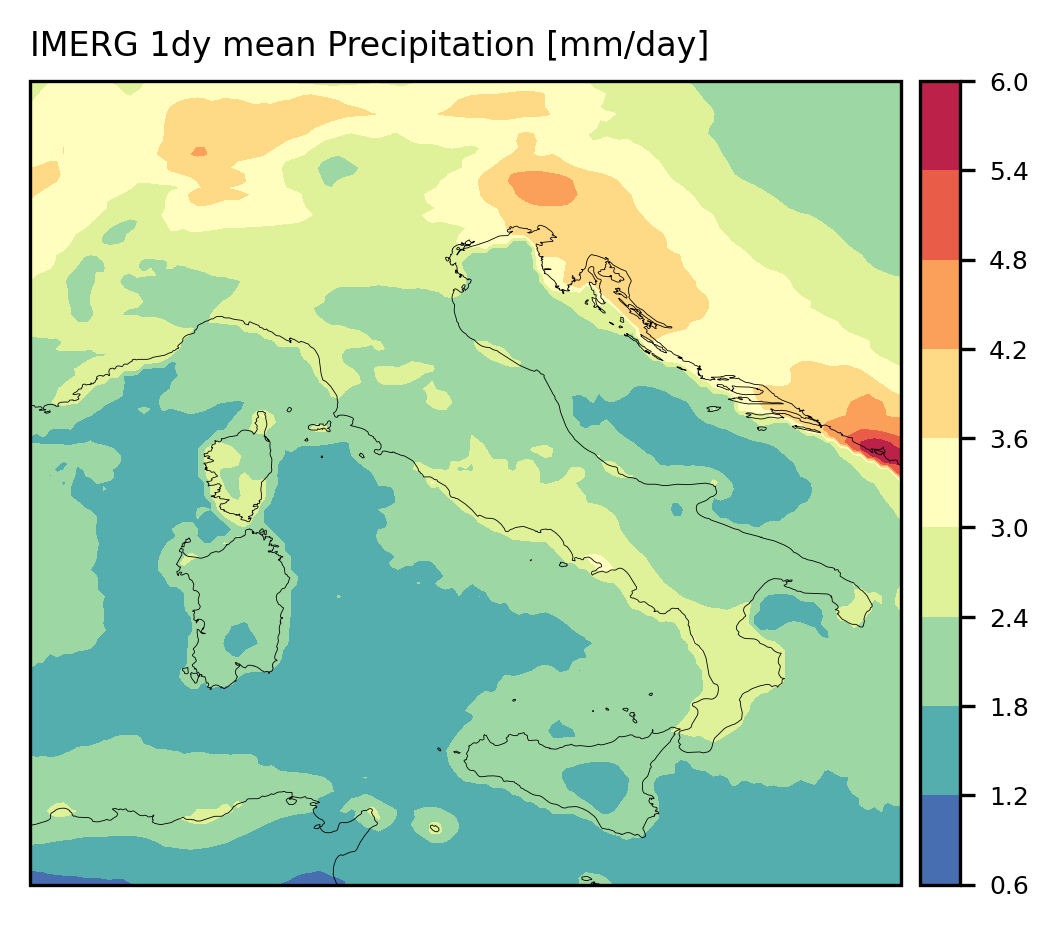

In [28]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2,color='k')
a1 = ax1.contourf(lon2d, lat2d, np.nanmean(PRE,axis=0), levels=None, cmap= cmap)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.02, fraction=0.0432)
cbar.ax.tick_params(labelsize=6)
ax1.set_title('IMERG 1dy mean Precipitation [mm/day]', fontsize=8, loc='left')

ax1.set_facecolor('white')
fig.patch.set_alpha(0)

In [25]:
Mev_d.shape

(6, 115, 125)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


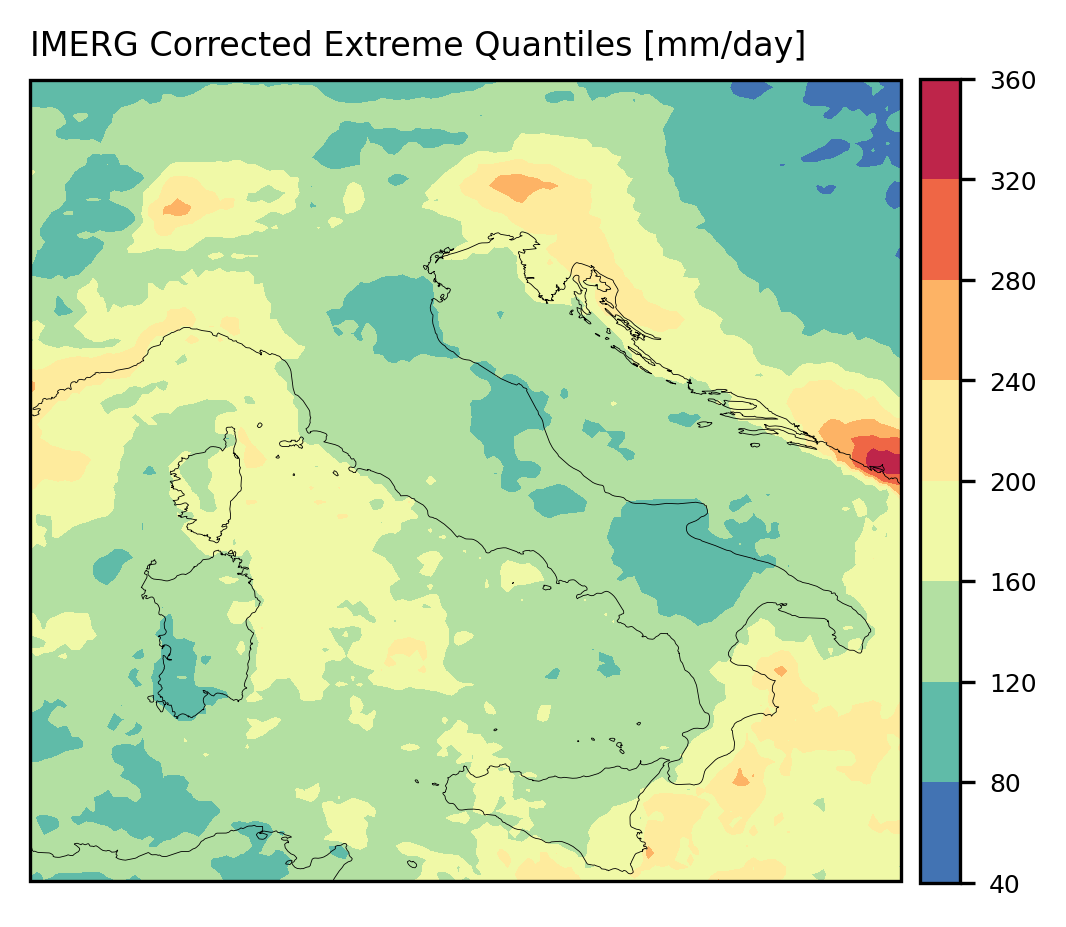

In [29]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2,color='k')
a1 = ax1.contourf(lon2d_d, lat2d_d, Mev_d[3,:,:], levels=None, cmap= cmap)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.02, fraction=0.0432)
cbar.ax.tick_params(labelsize=6)
ax1.set_title('IMERG Corrected Extreme Quantiles [mm/day]', fontsize=8, loc='left')

ax1.set_facecolor('white')
fig.patch.set_alpha(0)